In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [3]:
df = pd.read_csv('Ecommerce.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.drop(['Email','Address','Avatar'],axis=1, inplace=True)

In [5]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

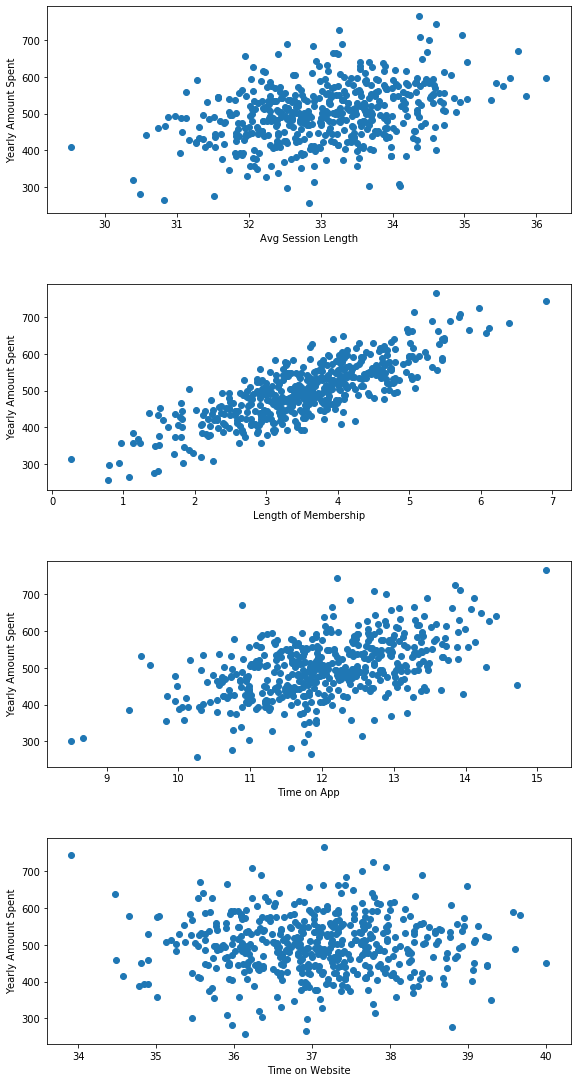

In [6]:
def plot_relationship(df,target):
    new_df = list(df.columns.difference([target]))
    fig, axes = plt.subplots(len(new_df), 1)
    fig.set_figwidth(8)
    fig.set_figheight(15)
    fig.tight_layout(h_pad = 5)
    
    for i in range(len(new_df)):
        
        axes[i].scatter(df[new_df[i]],df[target])
        axes[i].set_xlabel(new_df[i])
        axes[i].set_ylabel(target)
        
plot_relationship(df,'Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [7]:
df.drop(['Time on Website'],axis=1,inplace=True)

### Divide the dataset into training and test sets with the ratio 80:20.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'],test_size=0.2,random_state=100)

In [28]:
np.size(X_train[['Length of Membership']])

400

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [9]:
def fit_1d_linear_regression(x, y):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    x = np.array(x)
    y = np.array(y)
    
    x_mean, y_mean = np.mean(x),np.mean(y)
    n = len(x)
    num=0
    denom=0
    for i in range(n):
        num += (x[i]-x_mean)*(y[i]-y_mean)
        denom += (x[i]-x_mean)**2
    b1 = num/denom
    b0 = y_mean - b1*x_mean
    
    #b1= np.sum(np.multiply((x-np.mean(x),(y-np.mean(y))) / np.sum(pow(x-np.mean(x)),2)
                           
    return (b0,b1)

In [10]:
x = X_train[['Length of Membership']]
y = Y_train
b0,b1 = fit_1d_linear_regression(x,y)
print(b0,b1)

[267.88448251] [65.73627232]


The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [11]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.scatter(x,y)
    
    y_pred = b0+b1*x
    
    plt.plot(x,y_pred)
    plt.xlabel(x.columns[0])
    plt.ylabel(y.name)
    plt.title('{} by {}'.format(y.name,x.columns[0]))
    plt.show()
    plt.savefig('fitted_line.png')

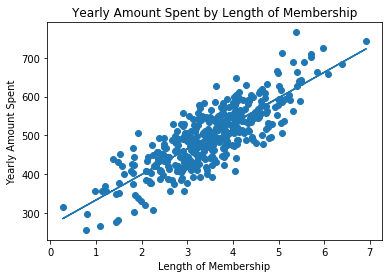

<Figure size 432x288 with 0 Axes>

In [12]:
plot_fitted_line(b0,b1,x,y)

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train[['Length of Membership']], Y_train)
print(linreg.intercept_,linreg.coef_)

267.88448251265135 [65.73627232]


In [15]:
print(fit_1d_linear_regression(x,y))

(array([267.88448251]), array([65.73627232]))


### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [16]:
print('Metrics obtained from fit_1d_linear_regression function:')

Y_pred = b0+b1*X_test[['Length of Membership']]

print('Mean absolute error: %.2f' % mean_absolute_error(Y_test, Y_pred))

print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))

print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(Y_test, Y_pred)))

print('R-squared: %.2f' % r2_score(Y_test, Y_pred))

Metrics obtained from fit_1d_linear_regression function:
Mean absolute error: 38.15
Mean squared error: 2258.34
Root mean squared error: 47.52
R-squared: 0.56


In [31]:
df.describe()

,Avg Session Length,Time on App,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,3.533462,499.314038
std,0.992563,0.994216,0.999278,79.314782
min,29.532429,8.508152,0.269901,256.670582
25%,32.341822,11.388153,2.930450,445.038277
50%,33.082008,11.983231,3.533975,498.887875
75%,33.711985,12.753850,4.126502,549.313828
max,36.139662,15.126994,6.922689,765.518462


In [29]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train[['Length of Membership']], Y_train)
y_prediction = linreg.predict(X_test[['Length of Membership']])

print('MAE: %.2f' % mean_absolute_error(Y_test, y_prediction))

print('MSE: %.2f' % mean_squared_error(Y_test, y_prediction))

print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_test, y_prediction)))

print('R-squared: %.2f' % r2_score(Y_test, y_prediction))

MAE: 38.15
MSE: 2258.34
RMSE: 47.52
R-squared: 0.56


In [26]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train[['Time on App']], Y_train)
y_prediction = linreg.predict(X_test[['Time on App']])

print('MAE: %.2f' % mean_absolute_error(Y_test, y_prediction))

print('MSE: %.2f' % mean_squared_error(Y_test, y_prediction))

print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_test, y_prediction)))

print('R-squared: %.2f' % r2_score(Y_test, y_prediction))

MAE: 51.45
MSE: 4028.86
RMSE: 63.47
R-squared: 0.21


In [27]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train[['Avg Session Length']], Y_train)
y_prediction = linreg.predict(X_test[['Avg Session Length']])

print('MAE: %.2f' % mean_absolute_error(Y_test, y_prediction))

print('MSE: %.2f' % mean_squared_error(Y_test, y_prediction))

print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_test, y_prediction)))

print('R-squared: %.2f' % r2_score(Y_test, y_prediction))

MAE: 52.17
MSE: 4406.68
RMSE: 66.38
R-squared: 0.13


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [18]:
linreg.fit(X_train, Y_train)
y_prediction = linreg.predict(X_test)

print('MAE: %.2f' % mean_absolute_error(Y_test, y_prediction))

print('MSE: %.2f' % mean_squared_error(Y_test, y_prediction))

print('RMSE: %.2f' % np.sqrt(mean_squared_error(Y_test, y_prediction)))

print('R-squared: %.2f' % r2_score(Y_test, y_prediction))

MAE: 8.78
MSE: 121.65
RMSE: 11.03
R-squared: 0.98


**Metrics interpretation**

As we can see from the above the accuracy of our model is much higher when we are using all features to train the model:
- R-squared is close to 1
- The residuals (as we see from error metrics) are much smaller

Moreover, from our analysis, we can also see that the *'Length of Membership'* feature has the highest impact on Yearly amount spent  